In [1]:
import numpy as np
import pandas as pd

지금까지 살펴본 신경망은 피드포워드 유형의 신경망이다. 피드포워드란 흐름이 단방향을 신경망을 말한다.

그러나 피드포워드 신경망은 **시계열 데이터의 성질(패턴)을 충분히 학습할 수 없다**는 커다란 단점이 있다.

그래서 **순환 신경망 <sup>Recurrent Neural Network</sup> (RNN)** 이 등장하게 되었다.

# 확률과 언어 모델

## word2vec을 확률 관점에서 바라보다

먼저 word2vec의 CBOW 모델을 간단히 복습해보자. 

말뭉치 $w_1, w_2, ...,w_{t-1},w_{t},w_{t+1},,..., w_T$ 에서 $w_{t-1}$과 $w_{t+1}$이 주어졌을 때 타깃 $w_t$가 될 확률은 다음과 같다. 

$$P(w_t|w_{t-1},w_{t+1})$$

이번에는 맥락을 왼쪽 윈도우만으로 한정해보자.

<img src="../imgs/fig 5-2.png" width="400" align='center'>

이제 확률 식은 다음으로 같다.

$$P(w_t|w_{t-2},w_{t-1})$$

이전에 나온 단어들의 확률 값으로 이후 단어를 예측하는 것. 이 식으로부터 언어 모델이 등장한다.

## 언어 모델

언어 모델 <sup>Language Model</sup>은 **특정한 단어의 시퀀스에 대해서, 그 시퀀스가 일어날 가능성이 어느 정도인지 (얼마나 자연스러운 단어 순서인지)를 확률로 평가한다.**

    - "you say goodbye" : 높은 확률
    - "you say good die" : 낮은 확률

응용 분야 

- 기계 번역과 음성 인식에서 문장이 얼마나 자연스러운지 판단하여 더 높은 자연스러움을 가진 문장을 반환
- 단어 순서의 자연스러움을 토대로 새로운 문장을 생성

---

#### 이제 언어 모델을 수식으로 이해해보자

$w_1,...,w_m$ 이라는 m개의 단어로 된 문장을 생각해보자.

이때 단어가 $w_1,...,w_m$이라는 순서로 출현할 확률을 $P(w_1,...,w_m)$의 동시 확률로 나타낼 수 있다.

이 동시 확률은 다음과 같이 분해하여 쓸 수 있다. 

<img src="../imgs/e 5-4.png" width="400" align='center'>

동시 확률 $P(w_1,...,w_m)$는 사후 확률의 총 곱인 $\prod{P(w_t|w_1,...,w_{t-1})}$ 으로 대표될 수 있다.    
여기서의 사후 확률은 **타깃 단어보다 왼쪽에 있는 모든 단어**를 맥락으로 했을 때의 확률과 같다. 

즉, 단어가 순서대로 출현할 확률은 동시 확률로 나타내질 수 있고, 이 동시 확률은 사후 확률의 총 곱으로 나타내질 수 있으니까. 우리의 목표는 사후 확률 $P(w_t|w_1,...,w_{t-1})$를 구하는 것!

## CBOW 모델을 언어 모델로?

그렇다면 word2vec의 CBOW 모델을 억지로 언어 모델에 적용하려면??

-> 맥락의 크기를 특정 값으로 한정하여 근사적으로 나타낼 수 있다! 맥락의 크기를 왼쪽 2개 단어로 한정한다면, 다음과 같이 표현 가능

$P(w_1,...,w_m) = \prod_{t=1}^{m}{P(w_t|w_1,...,w_{t-1})}\approx \prod_{t=1}^{m}{P(w_t|w_{t-2},w_{t-1})}$

맥락의 길이는 5나 10으로 임의로 설정 가능. 어쨌거나 **맥락의 크기는 특정 크기로 고정**된다.

---

### 한계

    이처럼 맥락의 크기가 고정될 경우 아래와 같이 맥락 크기보다 앞에 단서 단어가 나오는 케이스는 해결하기 힘들다.

 `Tom` was watching TV in his room. Mary came into the room. Mary said hi to `?`
    
   **1) 그렇다면 맥락의 크기를 20이나 30으로 키우면 되지 않을까?**

    but CBOW 모델에서는 레이어 내부에서 단어 벡터들의 합계를 내는 과정에서 맥락 안의 순서가 무시되기 때문에 적합하지 않다.

   **2) 엥 그렇다면 단어 벡터들 합하지 말고 concatenate하면 되지 않을까??**
    
    맥락의 크기에 비례해 매개변수가 증가한다. 

그러나 RNN의 단점도 많은 것으로 아는데...

---
### `세상에 두달만에 다시 시작;`

# RNN이란

RNN <sup>Recurrent Neural Network</sup>의 `Recurrent` : `몇 번이나 반복해서 일어나는 일, 순환한다`

즉, RNN은 우리 말로 **순환 신경망**이라고 부른다.

## 순환 신경망

`순환`하기 위해서는 닫힌 경로 혹은 순환하는 경로가 존재해야 한다. 그래야 데이터가 순환하면서 정보가 끊임없이 갱신된다. like loop!

<img src="../imgs/fig 5-7.png" width="400" align='center'>

- 그림의 RNN계층은 $X_t$를 입력받는데, 이때 t는 시각을 뜻한다.
- 시계열 데이터 $(x_0, x_1, x_2, x_3, ...) $ 를 의미함
- 입력에 대응하여 $(h_0, h_1, h_2, h_3, ...) $ 가 출력된다.

## 순환 구조 펼치기

<img src="../imgs/fig 5-8.png" width="700" align='center'>

#### vs 피드포워드 신경망   
**같은 점**
 - RNN 계층의 순환 구조를 펼침으로써 오른쪽으로 성장하는 긴 신경망으로 변신시킬 수 있다! Like 피드포워드 신경망!   
 
**다른 점**
- BUT 다수의 RNN 계층 모두가 실제로는 같은 계층인 것이 다르다!

---
**각 시각의 RNN 계층은 그 계층으로의 입력과 바로 직전의 RNN 계층으로부터의 출력을 받는다. 그리고 이 두 정보를 바탕으로 현 시각의 출력을 계산한다.**

 $$h_t = tanh(h_{t-1}W_h + x_tW_x + b) ....[식 5.9]$$

- RNN에는 가중치가 2개 있다
    - 입력 x를 출력 h로 변환하기 위한 가중치 $W_x$ - 화살표 위
    - 1개의 RNN 출력을 다음 시각의 출력으로 변환하기 위한 가중치 $W_h$ - 분기 화살표
    

- 식 5.9에서는 행렬 곱을 계산하고 그 합을 tanh 함수를 이용해 변환한다. 그 결과가 시각 t의 출력 $h_t$
- **$h_t$는 다른 계층을 향해 위쪽으로 출력되는 동시에, 다음 시각의 RNN 계층(자기 자신)을 향해 오른쪽으로도 출력됨!**

#### 현재의 출력 $h_t$은 한 시각 이전 출력 $h_{t-1}$에 기초해 계산된다!

그래서 RNN 계층을 `메모리가 있는 계층` 이라고도 말한다.

<sup>** $h_t$ : hidden state</sup>

## BPTT 

BPTT<sup>Backpropagation Through Time</sup> ==> 시간 방향으로 펼친 신경망의 오차역전파법

**BUT 긴-- 시계열 데이터 학습하기 어렵다!**
- 시계열 데이터의 시간 크기가 커지는 것에 비례하여 BPTT가 소비하는 컴퓨팅 자원이 증가함. 메모리 DEAD ㅠㅠ
- 기울기도 불안정해짐. Gradient Descent Problem

## Truncated BPTT

**큰 시계열 데이터를 취급할 때, 신경망 연결을 적당한 길이로 끊어 작은 신경망 여러 개로 만든다는 아이디어**

Truncated BPTT ==> 적당한 길이로 잘라낸 오차역전파법!

#### **** 주의 ****

- 순전파의 연결은 유지한다
- 역전파의 연결만을 끊어낸다

---
역전파의 연결만을 끊어낸다는 것이 무슨의미일까 

<img src="../imgs/fig 5-11.png" width="800" align = "center">

- RNN 계층을 길이 10개 단위로 학습할 수 있도록 역전파 연결을 끊음
- 그보다 미래의 데이터에 대해서는 생각할 필요가 없다! **각각의 블록 단위로, 미래의 블록과는 독립적으로 오차역전파법을 완결시킴**


<img src="../imgs/fig 5-14.png" width="800" align = "center">


- Step 1

    1) 순전파) 입력데이터 x0 - x9 (10블록) ==> h0 - h9 출력   
    2) 역전파) dh9--->dx9 - dh0--->dx0
    
- Step 2

    1) 순전파) Step 1의 마지막 은닉 상태인 h9를 통해 계층 연결! 입력데이터 x10 - x19 (10블록) ==> h0 - h9 출력   
    2) 역전파) dh19--->dx19 - dh10--->dx10

## Truncated BPTT의 미니배치 학습

길이가 1,000인 시계열 데이터에 대해서 시각의 길이를 10개 단위로 잘라 Truncated BPTT로 학습하는 경우!

- 첫 번째 미니배치 때는 처음부터 순서대로 데이터를 제공 
- 두 번째 미니배치 때는 500번째의 데이터를 시작위치로 정하고, 그 위치부터 다시 순서대로 데이터를 제공

<img src="../imgs/fig 5-15.png" width="600" align = "center">

# RNN 구현

<img src="../imgs/fig 5-17.png" width="600" align = "center">

- `RNN 계층` : Time RNN 계층 내에서 한 단계의 작업을 수행하는 계층
- `Time RNN 계층` : T개 단계 분의 작업을 한꺼번에 처리하는 계층

## RNN 계층 구현

 $$h_t = tanh(h_{t-1}W_h + x_tW_x + b) ....[식 5.9]$$
 
행렬 계산 시에는 형상이 중요하다!
- 미니배치 크기가 N, 입력 벡터의 차원 수가 D, 은닉 상태 벡터의 차원 수가 H

<img src="../imgs/fig 5-18.png" width="400" align = "center">

In [2]:
class RNN:
    def __init__(self, Wx, Wh, b): # 가중치 2개와 편향 1개 인수로
        self.params = [Wx, Wh, b]
        self.grads = [np.zeros_like(Wx),np.zeros_like(Wh),np.zeros_like(b)] #numpy.zeros_like : shape 유지하고 0으로 초기화
        self.cache = None # *** 역전파 계산 시 사용하는 중간 데이터 담는 곳
    def forward(self, x, h_prev):
        Wx, Wh, b = self.params
        t = np.matmul(h_prev, Wh) + np.matmul(x, Wx) + b # Main 식
        h_next = np.tanh(t) # 다음 시각 계층으로의 입력
        
        self.cache = (x,h_prev,h_next)
        return h_next
    
    def backward(self, dh_next):
        Wx, Wh, b = self.params
        x, h_prev, h_next = self.cache
        
        dt = dh_next * (1 - h_next**2) # tanh 미분 
        db = np.sum(dt, axis=0)
        dWh = np.matmul(h_prev.T, dt)
        dh_prev = np.matmul(dt, Wh.T)
        dWx = np.matmul(x.T, dt)
        dx = np.matmul(dt, Wx.T)
        
        self.grads[0][...] = dWx
        self.grads[1][...] = dWh
        self.grads[2][...] = db
        
        return dx,dh_prev

<img src="../imgs/fig 5-19.png" width="450" align = "left">
<img src="../imgs/fig 5-20.png" width="400" align = "right">

## Time RNN 계층 구현

**Time RNN 계층은 T개의 RNN 계층으로 구성된다**

- RNN 계층의 은닉 상태 h를 인스턴스 변수로 유지한다. 이 변수를 다음 RNN 레이어에 인계해주는 용도로 이용한다.

<img src= "../imgs/fig 5-22.png" width="700" align = "center">

In [3]:
class TimeRNN:
    def __init__(self, Wx, Wh, b, stateful=False): #stateful : 은닉상태 인계 받을지 여부
        self.params = [Wx, Wh, b ]
        self.grads = [np.zeros_like(Wx), np.zeros_like(Wh), np.zeros_like(b)]
        self.layers = None # T 개의 RNN 계층 리스트로 저장하는 용도
         
        self.h = None # forward() 메서드 이후 마지막 RNN 계층의 은닉상태 저장
        self.dh = None # backward() 메서드 이후 하나의 앞 블록의 은닉 상태의 기울기 저장
        
        # True : 아무리 긴 시계열 데이터여도 순전파를 끊지 않고 전파
        # False : 은닉 상태를 영행렬 (모든 요소가 0 행렬)로 초기화 
        self.stateful = stateful
        
    def set_state(self,h):# 은닉상태 설정 
        self.h = h
        
    def reset_state(self): # 은닉상태 초기화
        self.h = None
        
    # 순전파에서 입력 xs를 받는다
    # xs : T 개 분량의 시계열 데이터를 하나로 모은 것
    def forward(self, xs): 
        Wx, Wh, b = self.params
        # 미니배치크기 N, 시계열 데이터 T개, 입력 벡터 차원수 D
        N, T, D = xs.shape
        D, H = Wx.shape
        
        self.layers = []
        # 출력값 담을 그릇
        hs = np.empty((N, T, H), dtype = 'f') 
        
        # "stateful이 false" 이거나 "처음 호출 " 일때 영행렬로 초기화
        if not self.stateful or self.h is None: 
            self.h = np.zeros((N,H),dtype='f')
            
        # RNN 계층이 각 시간 t의 은닉 상태 h를 계산하고 이를 hs에 저장   
        for t in range(T):
            layer = RNN(*self.params) 
            self.h = layer.forward(xs[:,t,:], self.h) 
            hs[:,t,:] = self.h
            self.layers.append(layer)

        # forward가 처음 호출되면 h에는 마지막 RNN 계층의 은닉 상태가 저장됨
        # 다음번 forward 호출 시 stateful이 True면 먼저 저장된 h 값이 그대로 이용되고 False면 영행렬로 초기화
        return hs
    
    # 역전파
    def backward(self,dhs):
        Wx, Wh, b = self.params
        N, T, H = dhs.shape
        D, H = Wx.shape
        
        dxs = np.empty((N,T,D),dtype='f')
        dh = 0
        grads = [0,0,0]
        for t in reversed(range(T)):
            layer = self.layers[t]
            # RNN 계층의 순전파에서는 출력이 2개로 분기되어 역전파에서 각 기울기가 합산되어 전해짐
            dx, dh = layer.backward(dhs[:,t,:] + dh) # --> 합산된 기울기
            # dxs : 하류로 흘려보낼 기울기를 담을 그릇.. dx 여러개가 담김.
            dxs[:,t,:] = dx 
            
            for i, grad in enumerate(layer.grads):
                grads[i] += grad
                
        for i, grad in enumerate(grads):
            #각 RNN 계층의 가중치 기울기를 합산하여 최종 결과를 멤버 변수 self.grads에 덮어씀
            self.grads[i][...] = grad
        self.dh = dh
        
        return dxs

<img src= "../imgs/fig 5-24.png" width="600" align = "center">

# 시게열 데이터 처리 계층 구현

RNN을 사용하여 `언어 모델`을 구현하자   
-> RNN Language Model = RNNLM

## RNNLM의 전체 그림

<img src = "../imgs/fig 5-25.png" width = "700" align = "center">

1. `Embedding 계층` : 단어 ID를 단어의 분산 표현(단어 벡터)로 변환. 이 분산 표현이 `RNN 계층`의 입력으로 들어간다.
2. `RNN 계층` : 은닉 상태를 다음 층으로 출력함(위쪽으로) 과 동시에, 다음 시각의 `RNN 계층`으로 (오른쪽으로) 출력한다.
3. `RNN 계층`이 위로 출력한 은닉 상태는 `Affine 계층`을 거쳐 `Softmax 계층`으로 전해진다

예를 들어 you say goodbye and I say hello가 입력값으로 들어간다면

- 첫 단어로 you가 입력될 때 Softmax 계층이 출력하는 확률분포를 보면 say가 가장 높다.
- say 입력값에 대한 softmax 계층의 확률분포는 goodbye와 hello가 가장 높다.
    - you say goodbye or you say hello 둘다 make sense
    - **RNN 계층은 you say 라는 맥락을 기억하고 있다!**

**이처럼 RNN은 지금까지 입력된 단어를 기억하고 그것을 바탕으로 다음에 출현할 단어를 예측한다!!**

## Time 계층 구현

T개 분의 시계열 데이터를 한꺼번에 처리하는 계층을 Time XX계층이라 부르자.

<img src = "../imgs/fig 5-27.png" width = "600" align = "center">

In [4]:
class TimeEmbedding:
    def __init__(self, W):
        self.params = [W]
        self.grads = [np.zeros_like(W)]
        self.layers = None
        self.W = W

    def forward(self, xs):
        N, T = xs.shape
        V, D = self.W.shape
        
        out = np.empty((N,T,D),dtype='f')
        self.layers = []
        
        for t in range(T):
            layer = Embedding(self.W)
            out[:,t,:] = layer.forward(xs[:,t])
            self.layers.append(layer)
            
        return out
    
    def backward(self, dout):
        N, T, D = dout.shape
        grad = 0
        
        for t in range(T):
            layer = self.layers[t]
            layer.backward(dout[:,t,:])
            grad += layer.grads[0]
            
        self.grads[0][...] = grad
        return None

In [5]:
class TimeAffine:
    def __init__(self, W,b):
        self.params = [W,b]
        self.grads = [np.zeros_like(W),np.zeros_like(b)]
        self.x = None
        
    def forward(self, x):
        N, T, D = x.shape
        W, b = self.params
        
        rx = x.reshape(N*T, -1)
        out = np.dot(rx, W) + b
        
        self.x = x
        
        return out.reshape(N, T, -1)

    def backward(self, dout):
        x = self.x
        N, T, D = x.shape
        W, b = self.params

        dout = dout.reshape(N*T, -1)
        rx = x.reshape(N*T, -1)

        db = np.sum(dout, axis=0)
        dW = np.dot(rx.T, dout)
        dx = np.dot(dout, W.T)
        dx = dx.reshape(*x.shape)

        self.grads[0][...] = dW
        self.grads[1][...] = db

        return dx

예를 들어 Time Affine 계층은 그림처럼 T개의 Affine 계층을 준비해서 각 시각의 데이터를 개별적으로 처리하면 됨.

<img src = "../imgs/fig 5-28.png" width = "600" align = "center">

In [6]:
# 시계열 버전의 Softmax
class TimeSoftmaxWithLoss:
    def __init__(self):
        self.params, self.grads = [], []
        self.cache = None
        self.ignore_label = -1

    def forward(self, xs, ts):
        N, T, V = xs.shape

        if ts.ndim == 3:  # 정답 레이블이 원핫 벡터인 경우
            ts = ts.argmax(axis=2)

        mask = (ts != self.ignore_label)

        # 배치용과 시계열용을 정리(reshape)
        xs = xs.reshape(N * T, V)
        ts = ts.reshape(N * T)
        mask = mask.reshape(N * T)

        ys = softmax(xs)
        ls = np.log(ys[np.arange(N * T), ts])
        ls *= mask  # ignore_label에 해당하는 데이터는 손실을 0으로 설정
        loss = -np.sum(ls)
        loss /= mask.sum()

        self.cache = (ts, ys, mask, (N, T, V))
        return loss

    def backward(self, dout=1):
        ts, ys, mask, (N, T, V) = self.cache

        dx = ys
        dx[np.arange(N * T), ts] -= 1
        dx *= dout
        dx /= mask.sum()
        dx *= mask[:, np.newaxis]  # ignore_label에 해당하는 데이터는 기울기를 0으로 설정

        dx = dx.reshape((N, T, V))

        return dx

<img src = "../imgs/fig 5-29.png" width = "600" align = "center">

- $x_n$은 점수를 나타냄 (확률로 정규화되기 전 값)
- $t_n$는 정답 레이블을 나타냄

- T개의 Softmax with Loss 계층 각각이 손실을 산출한다. 그리고 그 손실을 합산, 평균한 값이 최종 손실이 됨.

# RNNLM 학습과 평가

## RNNLM 구현

<img src = "../imgs/fig 5-30.png" width = "350">

In [7]:
import numpy as np

class SimpleRnnlm:
    def __init__(self, vocab_size, wordvec_size, hidden_size):
        V, D, H = vocab_size, wordvec_size, hidden_size
        rn = np.random.randn
        
        # 가중치 초기화
        embed_W = (rn(V,D) / 100).astype('f')
        ## Xavier 초깃값 이용
        ## 이전 계층의 노드가 n개라면 표준편차가 1/sqrt(n)인 분포로 값을 초기화함
        rnn_Wx = (rn(D, H) / np.sqrt(D)).astype('f') 
        rnn_Wh = (rn(H, H) / np.sqrt(H)).astype('f')
        rnn_b = np.zeros(H).astype('f')
        affine_W = (rn(H, V) / np.sqrt(H)).astype('f')
        affine_b = np.zeros(V).astype('f')
        
        # 계층 생성
        self.layers = [
            TimeEmbedding(embed_W),
            TimeRNN(rnn_Wx, rnn_Wh, rnn_b, stateful=True),
            TimeAffine(affine_W, affine_b)
        ]
        self.loss_layer = TimeSoftmaxWithLoss()
        self.rnn_layer = self.layers[1]
        
        # 모든 가중치와 기울기를 리스트에 모은다.
        self.params, self.grads = [],[]
        for layer in self.layers:
            self.params += layer.params
            self.grads += layer.grads
            
    def forward(self, xs, ts):
        for layer in self.layers:
            xs = layer.forward(xs)
        loss = self.loss_layer.forward(xs, ts)
        return loss

    def backward(self, dout=1):
        dout = self.loss_layer.backward(dout)
        for layer in reversed(self.layers):
            dout = layer.backward(dout)
        return dout

    # 신경망의 상태 초기화 메서드
    def reset_state(self):
        self.rnn_layer.reset_state()      

## 언어 모델의 평가

언어 모델은 주어진 과거 단어로부터 다음에 출현할 단어의 확률분포를 출력한다.    
이때 언어 모델의 예측 성능을 평가하는 척도로 **퍼플렉시티 (perplexity)** 를 자주 이용한다.

- 퍼플렉시티 = "확률의 역수"  

--- 
### 입력 데이터 하나일 때 예시

- you say goodbye and I say hello .
    - 모델 1 : 입력이 you일 때 정답이 say일 확률 0.8. 이때 퍼플렉시티는 1/0.8 = 1.25
    - 모델 2 : 입력이 you일 때 정답이 say일 확률 0.2. 이때 퍼플렉시티는 1/0.2 = 5
        - **-> 퍼플렉시티는 작을 수록 좋다!**   
        
        
- 퍼플렉시티는 직관적으로  `분기 수`로 해석할 수 있다.
    - 1.25 - 다음에 출현할 수 있는 단어의 후보가 1개 정도
    - 5.0 - 다음에 출현할 수 있는 단어의 후보가 5개 정도 (후보가 많으니까 예측이 떨어짐)
    
    
### 입력 데이터 여러 개일 때 예시

$$ L = \frac{-1}{N} \sum_{n}\sum_{k}t_{nk}logy_{nk} $$

$$ perplexity = e^L $$

- N : 데이터의 총 개수
- $t_{n}$ : 원핫 벡터로 나타낸 정답 레이블
- $t_{nk}$ : n개째 데이터의 k번째 값을 의미
- $y_{nk}$ : 확률분포 ( Softmax의 출력 )

**교차 엔트로피 오차와 같은 식임. 퍼플렉시티가 작을 수록 좋은 모델!**

## RNNLM의 학습 코드

- PTB 데이터셋 1000개 단어 이용

In [45]:
import numpy as np
import sys
sys.path.append("../")
import matplotlib.pyplot as plt
import seaborn as sns

from common.optimizer import SGD
from dataset import ptb
from simple_rnnlm import SimpleRnnlm

# 하이퍼파라미터
batch_size = 10
wordvec_size = 100
hidden_size = 100 # RNN의 은닉 상태 벡터의 원소 수 
time_size = 5 # Truncated BPTT가 한 번에 펼치는 시간 크기
lr = 0.1
max_epoch = 100

# 학습 데이터 읽기
corpus, word_to_id, id_to_word = ptb.load_data('train')
corpus_size = 1000
corpus = corpus[:corpus_size]
vocab_size = int(max(corpus) + 1)

xs = corpus[:-1] # 입력
ts = corpus[1:] # 출력(정답 레이블) - xs보다 한 단어 앞
data_size = len(xs) # 999
print('말뭉치 크기: %d, 어휘 수: %d' % (corpus_size, vocab_size))

# 학습 시 사용하는 변수
max_iters = data_size // (batch_size * time_size)
time_idx = 0
total_loss = 0
loss_count = 0
ppl_list = []

# 모델 생성
model = SimpleRnnlm(vocab_size, wordvec_size, hidden_size)
optimizer = SGD(lr)

########################################
# 1 - 각 미니배치에서 샘플을 읽을 위치를 계산
jump = (corpus_size - 1) // batch_size
offsets = [i * jump for i in range(batch_size)]
#[0, 99, 198, 297, 396, 495, 594, 693, 792, 891] -> 오프셋의 각 원소에 데이터를 읽는 시작 위치가 담긴다!
########################################

for epoch in range(max_epoch):
    for iter in range(max_iters):
        ########################################
        # 2 - 미니배치 획득
        batch_x = np.empty((batch_size, time_size), dtype = 'i') #그릇 준비
        batch_t = np.empty((batch_size, time_size), dtype = 'i') ##그릇 준비
        for t in range(time_size): # time idx를 순차적으로 늘리면서 말뭉치에서 time idx위치의 데이터를 확보한다
            for i, offset in enumerate(offsets):
                batch_x[i,t] = xs[(offset + time_idx) % data_size]
                batch_t[i,t] = ts[(offset + time_idx) % data_size]
            time_idx += 1
        ########################################
        
        # 기울기를 구하여 매개변수 갱신
        loss = model.forward(batch_x, batch_t)
        model.backward()
        optimizer.update(model.params, model.grads)
        total_loss += loss
        loss_count += 1
        
    ########################################    
    # 3 - 에포크마다 퍼플렉시티 평가
    ppl = np.exp(total_loss / loss_count)
    print("| epoch %d | perplexity %.2f" % (epoch+1,ppl))
    ppl_list.append(float(ppl))
    total_loss, loss_count = 0,0
    ########################################

말뭉치 크기: 1000, 어휘 수: 418
| epoch 1 | perplexity 399.72
| epoch 2 | perplexity 278.50
| epoch 3 | perplexity 226.73
| epoch 4 | perplexity 217.86
| epoch 5 | perplexity 208.28
| epoch 6 | perplexity 202.46
| epoch 7 | perplexity 199.55
| epoch 8 | perplexity 196.42
| epoch 9 | perplexity 190.47
| epoch 10 | perplexity 191.64
| epoch 11 | perplexity 187.49
| epoch 12 | perplexity 191.19
| epoch 13 | perplexity 188.52
| epoch 14 | perplexity 189.09
| epoch 15 | perplexity 187.31
| epoch 16 | perplexity 184.72
| epoch 17 | perplexity 181.25
| epoch 18 | perplexity 178.71
| epoch 19 | perplexity 178.92
| epoch 20 | perplexity 179.26
| epoch 21 | perplexity 179.90
| epoch 22 | perplexity 173.38
| epoch 23 | perplexity 169.31
| epoch 24 | perplexity 170.63
| epoch 25 | perplexity 172.04
| epoch 26 | perplexity 167.07
| epoch 27 | perplexity 161.81
| epoch 28 | perplexity 161.34
| epoch 29 | perplexity 157.18
| epoch 30 | perplexity 149.53
| epoch 31 | perplexity 151.97
| epoch 32 | perplexity 

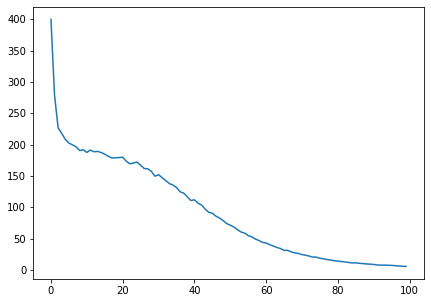

In [53]:
plt.figure(figsize=(7,5))
sns.lineplot(list(range(100)),ppl_list)
plt.show()

## RNNLM의 Trainer 클래스

In [71]:
import time

class RnnlmTrainer:
    def __init__(self, model, optimizer):
        self.model = model
        self.optimizer = optimizer
        self.time_idx = None
        self.ppl_list = None
        self.eval_interval = None
        self.current_epoch = 0
        
    def get_batch(self, x, t, batch_size, time_size):
        batch_x = np.empty((batch_size, time_size), dtype='i')
        batch_t = np.empty((batch_size, time_size), dtype='i')

        data_size = len(x)
        jump = data_size // batch_size
        offsets = [i * jump for i in range(batch_size)]  # 배치에서 각 샘플을 읽기 시작하는 위치

        for time in range(time_size):
            for i, offset in enumerate(offsets):
                batch_x[i, time] = x[(offset + self.time_idx) % data_size]
                batch_t[i, time] = t[(offset + self.time_idx) % data_size]
            self.time_idx += 1
        return batch_x, batch_t

    def fit(self, xs, ts, max_epoch=10, batch_size=20, time_size=35,
            max_grad=None, eval_interval=20):
        data_size = len(xs)
        max_iters = data_size // (batch_size * time_size)
        self.time_idx = 0
        self.ppl_list = []
        self.eval_interval = eval_interval
        model, optimizer = self.model, self.optimizer
        total_loss = 0
        loss_count = 0

        start_time = time.time()
        for epoch in range(max_epoch):
            for iters in range(max_iters):
                batch_x, batch_t = self.get_batch(xs, ts, batch_size, time_size) # 미니배치 순차적으로 만들기

                # 기울기를 구해 매개변수 갱신
                loss = model.forward(batch_x, batch_t) # 순전파 호출
                model.backward() # 역전파 호출
                params, grads = remove_duplicate(model.params, model.grads)  # 공유된 가중치를 하나로 모음
                if max_grad is not None:
                    clip_grads(grads, max_grad)
                optimizer.update(params, grads) # 옵티마이저로 가중치 갱신
                total_loss += loss
                loss_count += 1

                # 퍼플렉서티 평가
                if (eval_interval is not None) and (iters % eval_interval) == 0:
                    ppl = np.exp(total_loss / loss_count)
                    elapsed_time = time.time() - start_time
                    print('| 에폭 %d |  반복 %d / %d | 시간 %d[s] | 퍼플렉서티 %.2f'
                          % (self.current_epoch + 1, iters + 1, max_iters, elapsed_time, ppl))
                    self.ppl_list.append(float(ppl))
                    total_loss, loss_count = 0, 0

            self.current_epoch += 1

    def plot(self, ylim=None):
        x = numpy.arange(len(self.ppl_list))
        if ylim is not None:
            plt.ylim(*ylim)
        plt.plot(x, self.ppl_list, label='train')
        plt.xlabel('반복 (x' + str(self.eval_interval) + ')')
        plt.ylabel('퍼플렉서티')
        plt.show()
        
def remove_duplicate(params, grads):
    '''
    매개변수 배열 중 중복되는 가중치를 하나로 모아
    그 가중치에 대응하는 기울기를 더한다.
    '''
    params, grads = params[:], grads[:]  # copy list

    while True:
        find_flg = False
        L = len(params)

        for i in range(0, L - 1):
            for j in range(i + 1, L):
                # 가중치 공유 시
                if params[i] is params[j]:
                    grads[i] += grads[j]  # 경사를 더함
                    find_flg = True
                    params.pop(j)
                    grads.pop(j)
                # 가중치를 전치행렬로 공유하는 경우(weight tying)
                elif params[i].ndim == 2 and params[j].ndim == 2 and \
                     params[i].T.shape == params[j].shape and np.all(params[i].T == params[j]):
                    grads[i] += grads[j].T
                    find_flg = True
                    params.pop(j)
                    grads.pop(j)

                if find_flg: break
            if find_flg: break

        if not find_flg: break

    return params, grads

In [72]:
model = SimpleRnnlm(vocab_size, wordvec_size, hidden_size) 
optimizer = SGD(lr)
trainer = RnnlmTrainer(model, optimizer)

trainer.fit(xs, ts, max_epoch, batch_size, time_size)

| 에폭 1 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 415.79
| 에폭 2 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 372.66
| 에폭 3 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 257.59
| 에폭 4 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 222.06
| 에폭 5 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 211.43
| 에폭 6 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 210.20
| 에폭 7 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 201.32
| 에폭 8 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 201.43
| 에폭 9 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 196.19
| 에폭 10 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 191.46
| 에폭 11 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 192.36
| 에폭 12 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 189.57
| 에폭 13 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 192.87
| 에폭 14 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 188.23
| 에폭 15 |  반복 1 / 19 | 시간 1[s] | 퍼플렉서티 186.76
| 에폭 16 |  반복 1 / 19 | 시간 1[s] | 퍼플렉서티 190.96
| 에폭 17 |  반복 1 / 19 | 시간 1[s] | 퍼플렉서티 189.56
| 에폭 18 |  반복 1 / 19 | 시간 1[s] | 퍼플렉서티 184.49
| 에폭 19 |  반복 1 / 19 | 시간 1[s] | 퍼플렉서티 181.11
| 에폭 20 |  반복 1 / 19 | 시간 1[s] | 퍼플렉서티 181.67
| 에폭 21 |  반복 1 / 19 | 시간 1[s] | 퍼플렉서티 178.91
| 에폭 22 |  반복 1 / 19 | 시간 1[s] | 퍼플렉서티 177.